In [267]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split

import statsmodels.api as sm

from scipy import stats
from sklearn import metrics

%matplotlib inline

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [268]:
data=pd.read_csv('Heart.csv')

In [269]:
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [270]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [271]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age          303 non-null int64
Sex          303 non-null int64
ChestPain    303 non-null object
RestBP       303 non-null int64
Chol         303 non-null int64
Fbs          303 non-null int64
RestECG      303 non-null int64
MaxHR        303 non-null int64
ExAng        303 non-null int64
Oldpeak      303 non-null float64
Slope        303 non-null int64
Ca           299 non-null float64
Thal         301 non-null object
AHD          303 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 33.2+ KB


In [273]:
data.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [274]:
from scipy.stats.mstats import mode

In [275]:
data['Thal']=data['Thal'].fillna(value=data['Thal'].mode()[0])

In [276]:
data['Thal'].mode()[0]

'normal'

In [277]:
data['Ca']=data['Ca'].fillna(value=data['Ca'].mode()[0])

In [278]:
data['Sex_Cat']     = data.Sex.astype("category")
data['Fbs_Cat']     = data.Fbs.astype("category")
data['RestECG_Cat'] = data.RestECG.astype("category")
data['ExAng_Cat']   = data.ExAng.astype("category")
data['Slope_Cat']   = data.Slope.astype("category")
data['Ca_Cat']      = data.Ca.astype("category")

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
Age            303 non-null int64
Sex            303 non-null int64
ChestPain      303 non-null object
RestBP         303 non-null int64
Chol           303 non-null int64
Fbs            303 non-null int64
RestECG        303 non-null int64
MaxHR          303 non-null int64
ExAng          303 non-null int64
Oldpeak        303 non-null float64
Slope          303 non-null int64
Ca             303 non-null float64
Thal           303 non-null object
AHD            303 non-null object
Sex_Cat        303 non-null category
Fbs_Cat        303 non-null category
RestECG_Cat    303 non-null category
ExAng_Cat      303 non-null category
Slope_Cat      303 non-null category
Ca_Cat         303 non-null category
dtypes: category(6), float64(2), int64(9), object(3)
memory usage: 35.7+ KB


In [280]:
X_features = list(data.columns )
X_features.remove('AHD')
X_features.remove('Sex')
X_features.remove('Fbs')
X_features.remove('RestECG')
X_features.remove('ExAng')
X_features.remove('Slope')
X_features.remove('Ca')
X_features



['Age',
 'ChestPain',
 'RestBP',
 'Chol',
 'MaxHR',
 'Oldpeak',
 'Thal',
 'Sex_Cat',
 'Fbs_Cat',
 'RestECG_Cat',
 'ExAng_Cat',
 'Slope_Cat',
 'Ca_Cat']

In [281]:
data_complete = pd.get_dummies(data[X_features], drop_first= True)



In [282]:
len(data_complete.columns)

20

In [283]:


x = data_complete



In [284]:
data['AHD']  = data.AHD.replace(['Yes', 'No'], [1, 0])


In [285]:
y = data['AHD']

In [286]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 56 )

In [287]:
### feature scaling:

In [288]:
logit = sm.Logit( y_train, sm.add_constant( x_train ) )
lg = logit.fit()


Optimization terminated successfully.
         Current function value: 0.282095
         Iterations 8


In [289]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    AHD   No. Observations:                  212
Model:                          Logit   Df Residuals:                      191
Method:                           MLE   Df Model:                           20
Date:                Fri, 21 Sep 2018   Pseudo R-squ.:                  0.5904
Time:                        23:43:10   Log-Likelihood:                -59.804
converged:                       True   LL-Null:                       -146.00
                                        LLR p-value:                 2.962e-26
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.3315      3.897     -2.138      0.033     -15.970      -0.693
Age                     -0.0220      0.034     -0.650      0.516      -0.088       0.044
RestBP                   0.0419      0.017      2.540      0.011       0.010       0.074
Chol                     0.0043      0.005      0.856      0.392      -0.006       0.014
MaxHR                   -0.0110      0.014     -0.767      0.443      -0.039       0.017
Oldpeak                  0.5724      0.296      1.933      0.053      -0.008       1.153
ChestPain_nonanginal    -2.5226      0.694     -3.636      0.000      -3.882      -1.163
ChestPain_nontypical    -0.5652      0.680     -0.832      0.406      -1.897       0.767
ChestPain_typical       -3.7933      1.024     -3.706      0.000      -5.800      -1.787
Thal_normal              0.4884      1.017      0.480      0.631      -1.505       2.482
Thal_reversable          2.0656      1.009      2.048      0.041       0.089       4.043
Sex_Cat_1                2.0349      0.715      2.846      0.004       0.634       3.436
Fbs_Cat_1               -0.2230      0.664     -0.336      0.737      -1.524       1.078
RestECG_Cat_1            1.2704      3.131      0.406      0.685      -4.866       7.407
RestECG_Cat_2            0.3734      0.520      0.718      0.473      -0.646       1.392
ExAng_Cat_1              0.3734      0.592      0.630      0.528      -0.787       1.534
Slope_Cat_2              1.8926      0.618      3.061      0.002       0.681       3.105
Slope_Cat_3              0.9617      1.056      0.910      0.363      -1.109       3.032
Ca_Cat_1.0               2.8868      0.679      4.254      0.000       1.557       4.217
Ca_Cat_2.0               4.0155      1.303      3.083      0.002       1.462       6.569
Ca_Cat_3.0               1.5531      1.286      1.208      0.227      -0.967       4.073
========================================================================================
"""

In [290]:
significant_vars = get_significant_vars( lg, sig_level = 0.05 )
significant_vars

['const',
 'RestBP',
 'ChestPain_nonanginal',
 'ChestPain_typical',
 'Thal_reversable',
 'Sex_Cat_1',
 'Slope_Cat_2',
 'Ca_Cat_1.0',
 'Ca_Cat_2.0']

In [291]:
def get_significant_vars( lm, sig_level ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= sig_level]['vars'] )

In [292]:
def get_predictions( x, y, model ):
    y_pred_df = pd.DataFrame( { 'actual': y,
    "predicted_prob": model.predict( sm.add_constant( x ) ) } )
    return y_pred_df

In [293]:
y_pred_df = get_predictions( x_train, y_train, lg )

In [294]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_df[0:10]

,actual,predicted_prob,predicted
251,1,0.998217,1
99,0,0.078871,0
204,0,0.194635,0
263,0,0.005791,0
30,0,0.053965,0
112,0,0.004955,0
275,0,0.397358,0
38,1,0.997553,1
21,0,0.001569,0
166,0,0.010147,0


In [295]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



Confusion Matrix for training data
[[ 83  13]
 [  8 108]]


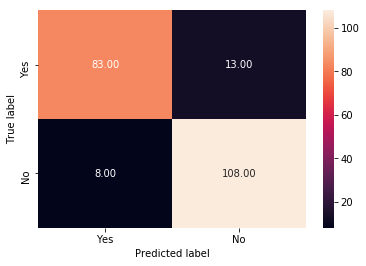

Total Accuracy :  0.9
Precision :  0.91
Recall :  0.86


In [296]:
cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )

print("\nConfusion Matrix for training data")
print(cm1)

draw_cm( y_pred_df.actual, y_pred_df.predicted )

print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_train, y_pred_df.predicted ), 2 ) )

print( 'Precision : ',np.round( metrics.precision_score( y_train, y_pred_df.predicted ), 2 ) )

print( 'Recall : ',np.round( metrics.recall_score( y_train, y_pred_df.predicted ), 2 ) )


### Test Data

In [297]:
y_pred_df = get_predictions( x_test, y_test, lg )


In [298]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_df[0:10]

,actual,predicted_prob,predicted
81,0,0.183577,0
168,1,0.630792,1
137,1,0.992674,1
242,0,0.016351,0
2,1,0.999127,1
109,1,0.863872,1
216,0,0.002414,0
119,1,0.998435,1
132,0,0.074281,0
13,0,0.183211,0



Confusion Matrix for testing data
[[34  9]
 [ 4 44]]


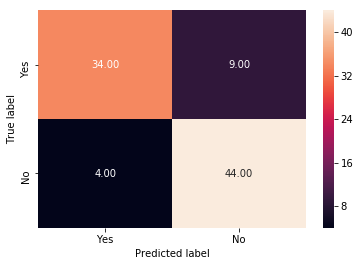

Total Accuracy :  0.86
Precision :  0.89
Recall :  0.79


In [299]:
cm2 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )

print("\nConfusion Matrix for testing data")
print(cm2)

draw_cm( y_pred_df.actual, y_pred_df.predicted )

print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted ), 2 ) )

print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted ), 2 ) )


In [302]:
def back_var_sel(x_train, y_train):
    """a simple function to perform backward variable selection. 
    Input arguments are :  1) a dataframe with independent variables and 2) a df with target variable
    (basically x_train and y_train)2018-08-26 00:50:27 """
    imp_features = list(x_train.columns)
    not_imp_features = list()
    model = sm.OLS(y_train, sm.add_constant(x_train[imp_features])).fit()
    p_values = pd.DataFrame(model.pvalues[1:])

    while max(p_values[0]) > 0.05:
        not_imp_features.append(
            list(p_values[p_values[0] == max(p_values[0])].index)[0])
        imp_features = list(p_values[p_values[0] != max(p_values[0])].index)
        model = sm.OLS(y_train, sm.add_constant(x_train[imp_features])).fit()
        p_values = pd.DataFrame(round(model.pvalues[1:], 4))

    print('Important features are', imp_features, '\nRedundant features are',
          not_imp_features)
    return imp_features, not_imp_features,model

In [303]:
imp_features, not_imp_features,model = back_var_sel(x_train, y_train)

Important features are ['RestBP', 'Oldpeak', 'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical', 'Thal_reversable', 'Sex_Cat_1', 'Slope_Cat_2', 'Ca_Cat_1.0', 'Ca_Cat_2.0', 'Ca_Cat_3.0'] 
Redundant features are ['Fbs_Cat_1', 'Thal_normal', 'Chol', 'Age', 'MaxHR', 'RestECG_Cat_1', 'RestECG_Cat_2', 'ExAng_Cat_1', 'Slope_Cat_3']


In [304]:
imp_features

['RestBP',
 'Oldpeak',
 'ChestPain_nonanginal',
 'ChestPain_nontypical',
 'ChestPain_typical',
 'Thal_reversable',
 'Sex_Cat_1',
 'Slope_Cat_2',
 'Ca_Cat_1.0',
 'Ca_Cat_2.0',
 'Ca_Cat_3.0']

### Cart Model

In [305]:
from sklearn.tree import DecisionTreeClassifier

#Setting the parameter
clf = DecisionTreeClassifier(criterion = "gini" , 
                             min_samples_split = 100,
                             min_samples_leaf = 10,
                             max_depth = 50)

In [307]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [311]:
import pydot
from sklearn.tree import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
dot_data = StringIO()
feature_list = list(x_train.columns.values)
export_graphviz(clf, 
                out_file = dot_data, 
                feature_names = feature_list)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf(".\ctree_output\classification_tree_output.pdf")



In [312]:
Nodes = pd.DataFrame(clf.tree_.__getstate__()["nodes"])
Nodes

feature_importance = pd.DataFrame([x_train.columns,
                               clf.tree_.compute_feature_importances()])
feature_importance.T 


,0,1
0,Age,0
1,RestBP,0
2,Chol,0
3,MaxHR,0
4,Oldpeak,0.1432
5,ChestPain_nonanginal,0.104004
6,ChestPain_nontypical,0
7,ChestPain_typical,0
8,Thal_normal,0.752796
9,Thal_reversable,0


In [313]:
## Let us see how good is the model
pred_y_train = clf.predict(x_train )
pred_y_train

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [314]:
## Let us see the classification accuracy of our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
score = accuracy_score(y_train, pred_y_train)
score

0.7783018867924528

In [315]:
y_train_prob = clf.predict_proba(x_train)

In [318]:
pd.DataFrame(y_train_prob).head()

,0,1
0,0.263158,0.736842
1,0.706897,0.293103
2,0.263158,0.736842
3,0.978723,0.021277
4,0.706897,0.293103


In [319]:
## AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc(fpr, tpr)

0.8181124281609196

## Let us see how good is the model on TEST

In [320]:
pred_y_test = clf.predict(x_test)
score_h = accuracy_score(y_test, pred_y_test)
score_h

0.7802197802197802

In [321]:
y_test_prob = clf.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc(fpr, tpr)

0.7812499999999999

In [322]:
y_freq = np.bincount(y_train)
y_val = np.nonzero(y_freq)[0]
np.vstack((y_val,y_freq[y_val])).T

array([[  0, 116],
       [  1,  96]])

In [323]:
#Cross validation function
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(clf, x_train , y_train, cv = 10, scoring='roc_auc')
scores.mean()
scores.std()


0.09435642133159494

In [324]:
y_train_prob = clf.predict_proba(x_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc(fpr, tpr)

0.8181124281609196

In [325]:
y_test_prob = clf.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc(fpr, tpr)

0.7812499999999999

In [326]:
## Tuning the Classifier using GridSearchCV
from sklearn.grid_search import GridSearchCV
help(GridSearchCV)

param_dist = {"criterion": ["gini","entropy"],
              "max_depth": np.arange(3,10),
              }

tree = DecisionTreeClassifier(min_samples_split = 100,
                             min_samples_leaf = 10)

tree_cv  = GridSearchCV(tree, param_dist, cv = 10, 
                        scoring = 'roc_auc', verbose = 100)

tree_cv.fit(x_train,y_train)


/Users/sanaam/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Help on class GridSearchCV in module sklearn.grid_search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  .. deprecated:: 0.18
 |      This module will be removed in 0.20.
 |      Use :class:`sklearn.model_selection.GridSearchCV` instead.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      A object of that type is instantiated for each grid point.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Eith

[CV] ............ criterion=gini, max_depth=6, score=0.820833 -   0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.2s remaining:    0.0s
[CV] criterion=gini, max_depth=6 .....................................
[CV] ............ criterion=gini, max_depth=6, score=0.875000 -   0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.2s remaining:    0.0s
[CV] criterion=gini, max_depth=6 .....................................
[CV] ............ criterion=gini, max_depth=6, score=0.841667 -   0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s remaining:    0.0s
[CV] criterion=gini, max_depth=6 .....................................
[CV] ............ criterion=gini, max_depth=6, score=0.787500 -   0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.2s remaining:    0.0s
[CV] criterion=gini, max_depth=6 .....................................
[CV] ............ criterion=gini, max_depth=6, score=0.766667 -   0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35

[CV] ......... criterion=entropy, max_depth=5, score=0.858333 -   0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.6s remaining:    0.0s
[CV] criterion=entropy, max_depth=5 ..................................
[CV] ......... criterion=entropy, max_depth=5, score=0.661616 -   0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    0.6s remaining:    0.0s
[CV] criterion=entropy, max_depth=5 ..................................
[CV] ......... criterion=entropy, max_depth=5, score=0.803030 -   0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    0.6s remaining:    0.0s
[CV] criterion=entropy, max_depth=5 ..................................
[CV] ......... criterion=entropy, max_depth=5, score=0.636364 -   0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    0.6s remaining:    0.0s
[CV] criterion=entropy, max_depth=5 ..................................
[CV] ......... criterion=entropy, max_depth=5, score=0.601010 -   0.0s
[CV] criterion=entropy, max_depth=6 .....

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=100)

In [327]:
## Building the model using best combination of parameters
print("Tuned Decision Tree parameter : {}".format(tree_cv.best_params_))

classifier = tree_cv.best_estimator_

classifier.fit(x_train,y_train)


Tuned Decision Tree parameter : {'criterion': 'entropy', 'max_depth': 3}


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [330]:
#predicting probabilities
y_train_prob = classifier.predict_proba(x_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc_d = auc(fpr, tpr)
auc_d


0.8006016522988505

In [331]:
y_test_prob = classifier.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc_h = auc(fpr, tpr)
auc_h

0.7739825581395348

In [334]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [336]:
auc_score = metrics.roc_auc_score( y_train,y_train_prob[:,1])


In [337]:
auc_score

0.8006016522988505

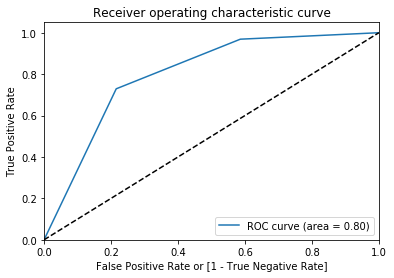

In [338]:
fpr, tpr, thresholds = draw_roc(y_train,y_train_prob[:,1])